Logical fail rate: 0.0


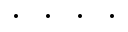

In [1]:
import stim, pymatching as pm, numpy as np
from IPython.display import SVG

# d=3 rotated surface code, one round, circuit noise-free

c = stim.Circuit()
# data qubits 0..8
# ancillas 9..12
# measure 4 plaquettes
c.append("M", [9,10,11,12])
for i in range(4):
    c.append("DETECTOR", [stim.target_rec(-1-i)])

c.append("OBSERVABLE_INCLUDE", [stim.target_rec(-1)], 0)

dem = c.detector_error_model()
m = pm.Matching.from_detector_error_model(dem)

sampler = c.compile_detector_sampler()
dets, obs = sampler.sample(shots=1000, separate_observables=True)

pred = m.decode_batch(dets)
print("Logical fail rate:", np.mean(pred != obs))
SVG(str(c.diagram("detslice-svg")))


In [35]:
import pymatching as pm
dem = c.detector_error_model(decompose_errors=True)
m = pm.Matching.from_detector_error_model(dem)
pred = m.decode_batch(dets)         # compare vs obs to get p_L
pL = np.mean(pred != obs, axis=0)


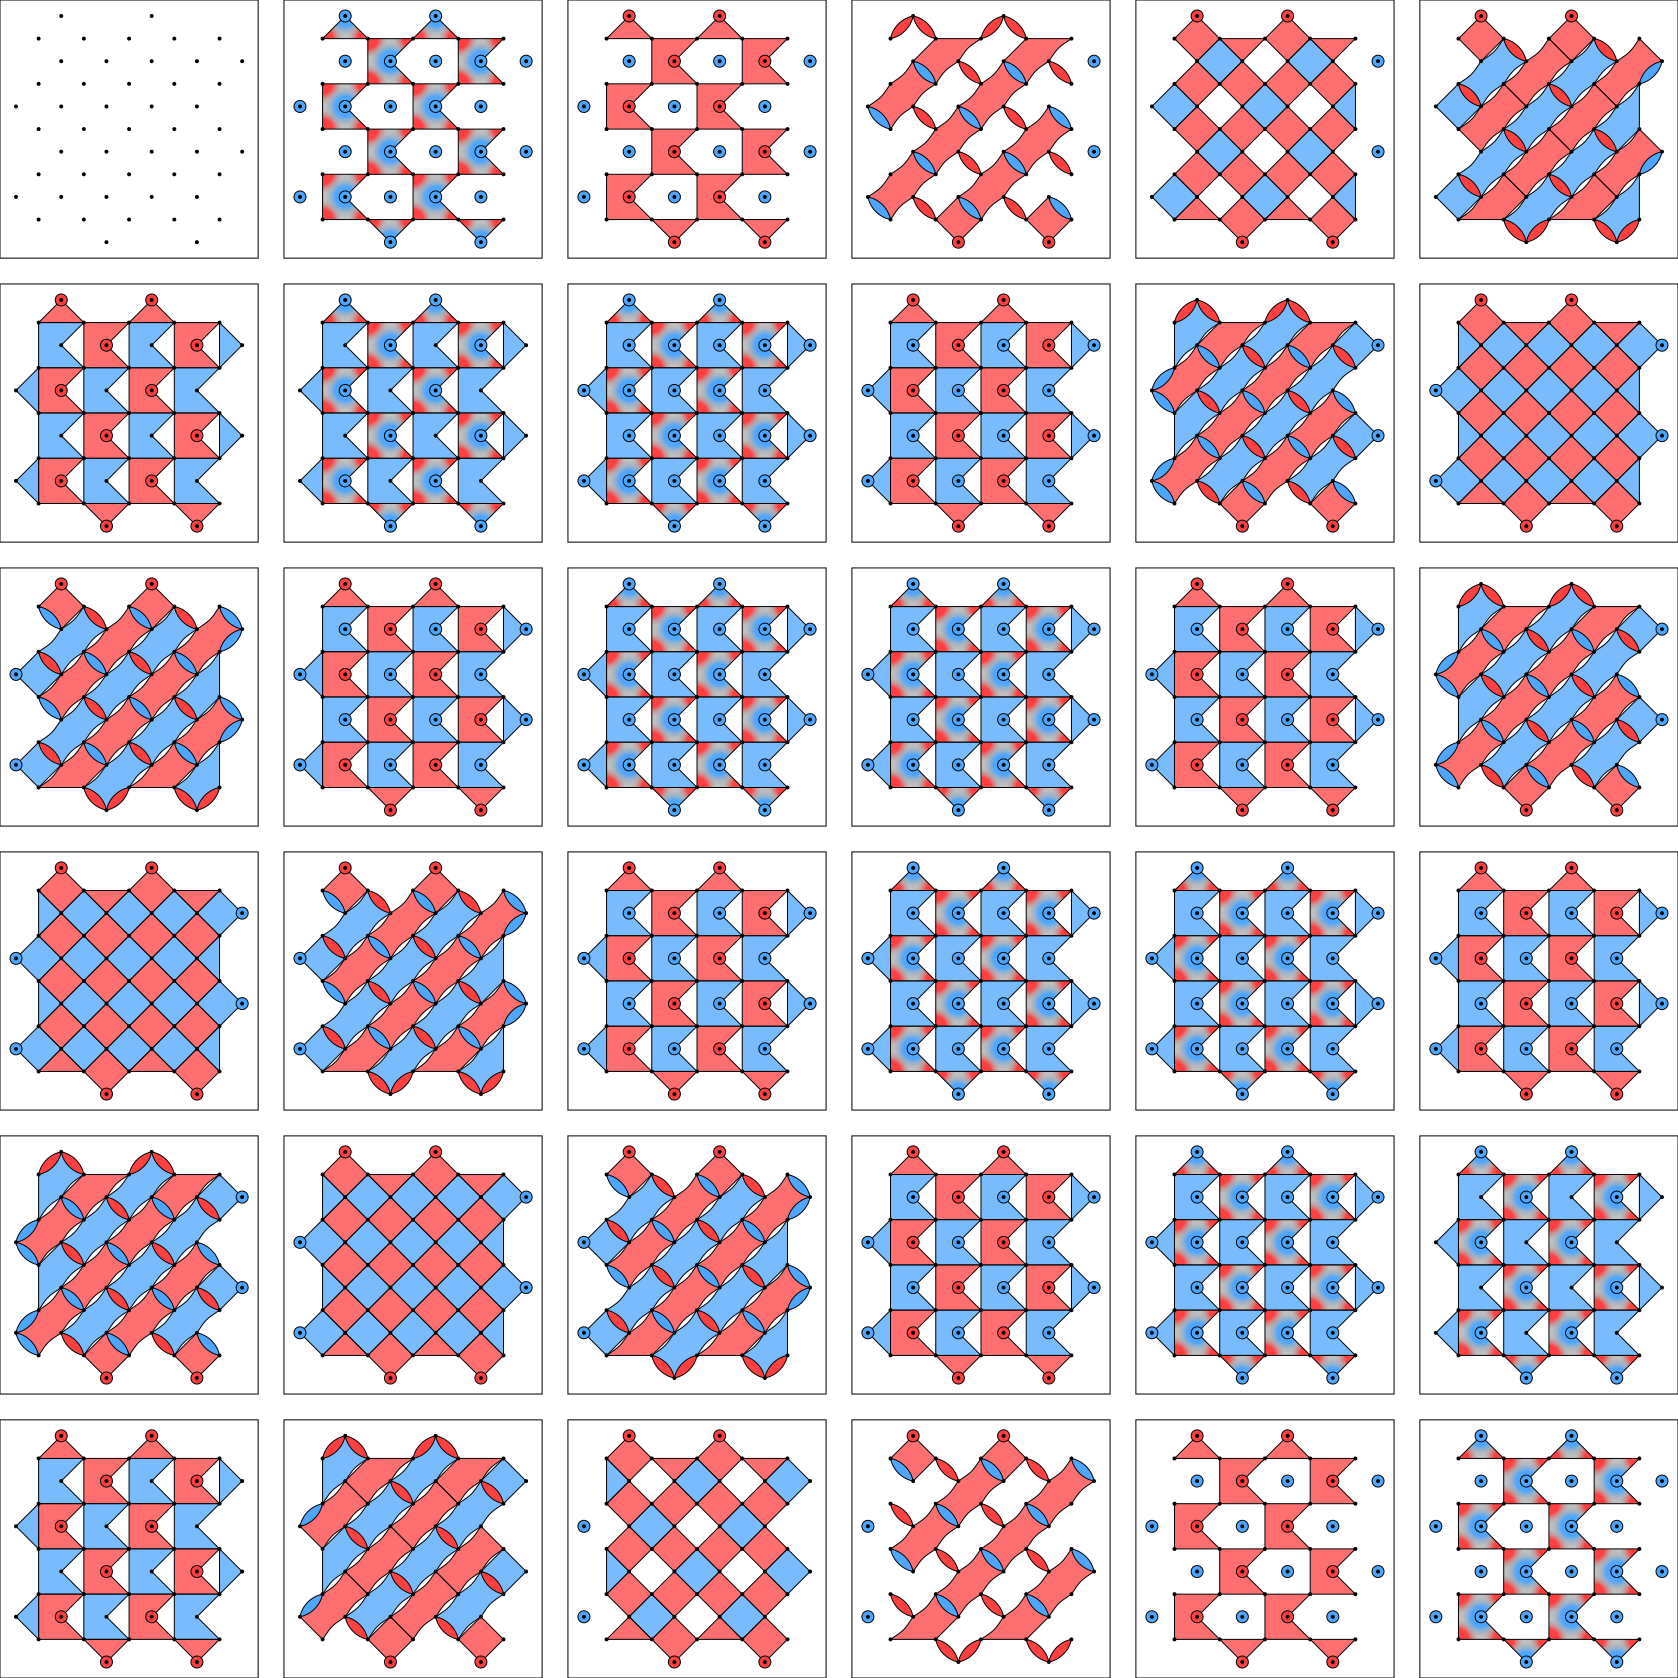

In [36]:
import stim
c = stim.Circuit.generated(
    "surface_code:rotated_memory_x",
    distance=5,
    rounds=5,
    after_clifford_depolarization=0.005
)
c[1]
SVG(str(c.diagram("detslice-svg")))

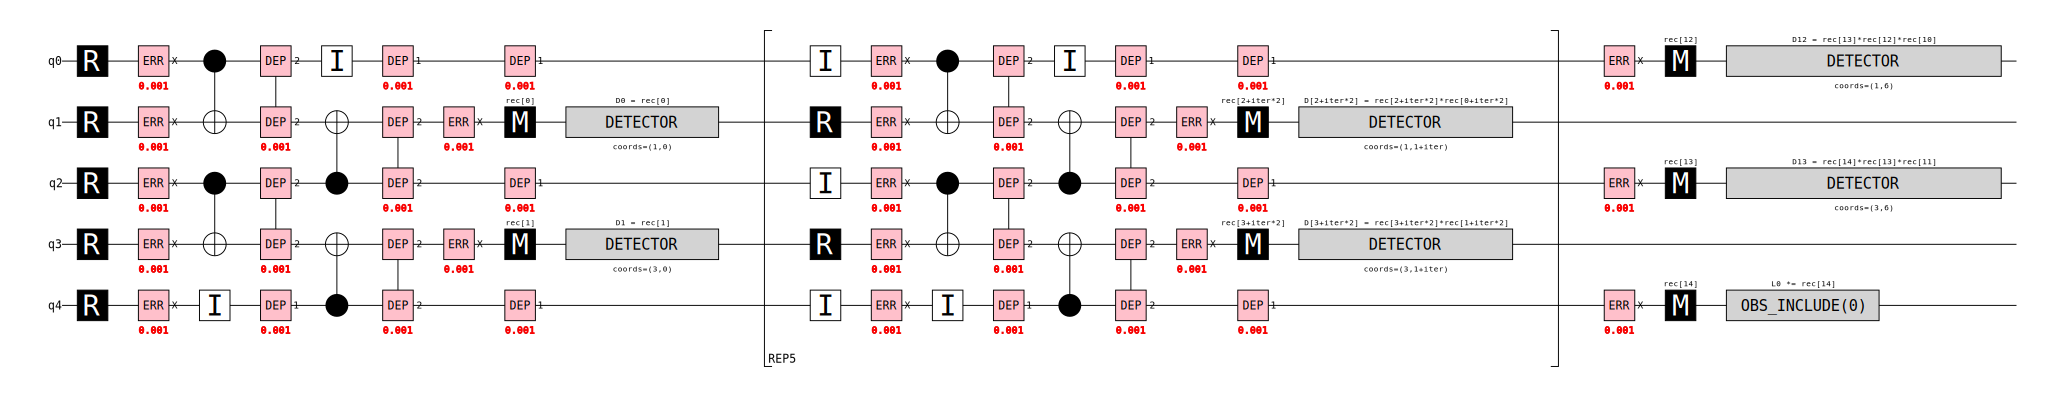

In [ ]:
circ_str = """
    R 0 1 2 3 4
    X_ERROR(0.001) 0 1 2 3 4
    CX 0 1 2 3
    I 4
    DEPOLARIZE2(0.001) 0 1 2 3
    DEPOLARIZE1(0.001) 4
    CX 2 1 4 3
    I 0
    DEPOLARIZE1(0.001) 0
    DEPOLARIZE2(0.001) 2 1 4 3
    X_ERROR(0.001) 1 3
    M 1 3
    DEPOLARIZE1(0.001) 0 2 4
    DETECTOR(1, 0) rec[-2]
    DETECTOR(3, 0) rec[-1]

    REPEAT 5 {
        R 1 3
        I 0 2 4
        X_ERROR(0.001) 0 1 2 3 4
        CX 0 1 2 3
        I 4
        DEPOLARIZE2(0.001) 0 1 2 3
        DEPOLARIZE1(0.001) 4
        CX 2 1 4 3
        I 0
        DEPOLARIZE1(0.001) 0
        DEPOLARIZE2(0.001) 2 1 4 3
        X_ERROR(0.001) 1 3
        M 1 3
        DEPOLARIZE1(0.001) 0 2 4
        SHIFT_COORDS(0, 1)
        DETECTOR(1, 0) rec[-2] rec[-4]
        DETECTOR(3, 0) rec[-1] rec[-3]
    }
    X_ERROR(0.001) 0 2 4
    M 0 2 4
    SHIFT_COORDS(0, 1)
    DETECTOR(1, 0) rec[-2] rec[-3] rec[-5]
    DETECTOR(3, 0) rec[-1] rec[-2] rec[-4]

    OBSERVABLE_INCLUDE(0) rec[-1]
"""
c = stim.Circuit(circ_str)
SVG(str(c.diagram("timeline")))


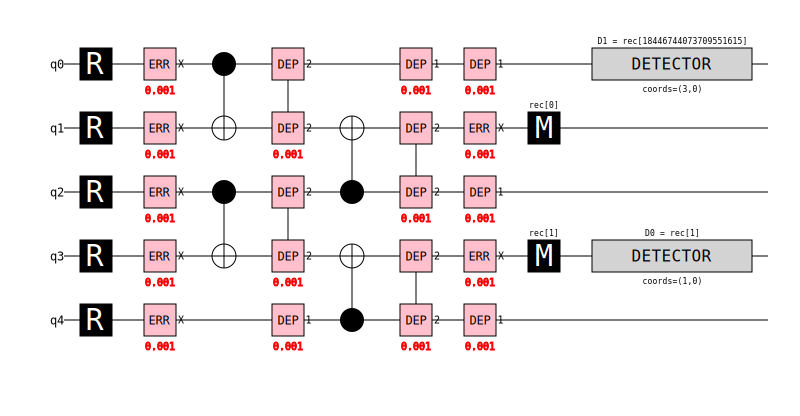

In [58]:
d = 3
n = d * 2 - 1
p = 0.001
rounds = 5

c = stim.Circuit()
qubits = range(n)
q_dat = qubits[::2]
q_meas = qubits[1::2]
c.append("R", range(n))
c.append("X_ERROR", range(n), p)
for i in q_meas:
    c.append("CNOT", [i-1, i])
for i in q_meas:
    c.append("DEPOLARIZE2", [i-1, i], p)
c.append("DEPOLARIZE1", [n-1], p)
for i in q_meas:
    c.append("CNOT", [i+1, i])
for i in q_meas:
    c.append("DEPOLARIZE2", [i+1, i], p)
c.append("DEPOLARIZE1", 0, p)
for i in q_meas:
    c.append("X_ERROR", [i], p)
for i in q_dat:
    c.append("DEPOLARIZE1", [i], p)
for i in q_meas:
    c.append("M", [i])
for i in q_meas:
    c.append("DETECTOR", [stim.target_rec(-i)], [i,0])

# repeate_circuit = c
# repeate_circuit = stim.Circuit()
# for j in range(rounds):
#     for i in q_meas:
#         repeate_circuit.append("CNOT", [i-1, i])
#     for i in q_meas:
#         repeate_circuit.append("DEPOLARIZE2", [i-1, i], p)
#     repeate_circuit.append("DEPOLARIZE1", [n-1], p)
#     for i in q_meas:
#         repeate_circuit.append("CNOT", [i+1, i])
#     for i in q_meas:
#         repeate_circuit.append("DEPOLARIZE2", [i+1, i], p)
#     repeate_circuit.append("DEPOLARIZE1", 0, p)
#     for i in q_meas:
#         repeate_circuit.append("X_ERROR", [i], p)
#     for i in q_dat:
#         repeate_circuit.append("DEPOLARIZE1", [i], p)
#     for i in q_meas:
#         repeate_circuit.append("M", [i])
#     repeate_circuit.append("SHIFT_COORDS")
#     for i in q_meas:
#         repeate_circuit.append("DETECTOR", [stim.target_rec(-2 - 2 * (len(q_meas) - 1 - q_meas.index(i))),
#                                stim.target_rec(-4 - 2 * (len(q_meas) - 1 - q_meas.index(i)))])
        


SVG(str(c.diagram("timeline")))